# **Bank Marketing Analysis With AutoML** 
## **Assignment-2 : AutoML**
*For DSEM- Spring 2022*

The goal of this Assignment is to use AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm and create multivariate models.

## **Story of the Data...**

The data was obtained from the UCI website and is completely open source and free for use, here's the link below

https://archive.ics.uci.edu/ml/datasets/bank+marketing



Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
## Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

It's the year 2008, and a little Bank in Portugal decided to scale up and get more customers, following this idea they decided to call potential customers and talk them into subscibing to their term deposit.\
Fast forward to 2023, A grad student trying to learn about Data Science picks the dataset to analyse all that happened then and determine what lead to the success(or absolute failure) of this campaign.\
Feels like a Netflix show where we're going back in time, On second thought... why not make it just that?!\
So brace yourself for this journey, "I'm your Captain speaking, All aboard the SkunksShip! our destination is Portugal 2003, and Data Science will be our Quantum time travel with an objective to predict whether a customer will subscribe the bank's proposed product or not"

As a great man once said, "Importing Libraries"

In [765]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from matplotlib import pyplot
import os
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

Our data is hosted on Github and as a sorted Excel file, We'll work on it a little in this format, BUT we will be converting to CSV and H20 compatible ones

In [766]:
data = pd.ExcelFile("https://github.com/Varadmurty-mohod/Bank-Marketing-Analysis/blob/main/Data/AutoML_sorted_data.xlsx?raw=true")

I've seperated all the parameters into different sheets in the excel file just for ease of access and having them in categories helps.

In [767]:
data.sheet_names

['CLIENT_INFO', 'LOAN_HISTORY', 'MARKETING HISTORY', 'SUBSCRIPTION HISTORY']

In [768]:
clientinfo = pd.read_excel(data, 'CLIENT_INFO')
loanhist = pd.read_excel(data, 'LOAN_HISTORY')
marketinghist = pd.read_excel(data, 'MARKETING HISTORY')
subscriptionhist = pd.read_excel(data, 'SUBSCRIPTION HISTORY')

Converting to CSV

In [769]:
clientinfo.to_csv('client_info.csv')
loanhist.to_csv('loan_history.csv')
marketinghist.to_csv('marketing_history.csv')
subscriptionhist.to_csv('subscription_history.csv')

Let's have a look to make sure it's all good

In [770]:
loanhist.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [771]:
clientinfo.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [772]:
marketinghist.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [773]:
subscriptionhist.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


We'll merge everything into one dataframe, using the common key ID

In [774]:
df = pd.merge(clientinfo, loanhist, on=['ID'])
df = pd.merge(df, marketinghist, on=['ID'])
df = pd.merge(df, subscriptionhist, on=['ID'])

In [775]:
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dropping ID since it's not a predictor

In [776]:
df = df.drop(columns=['ID'], axis=1)

In [777]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [778]:
df.to_csv('df.csv')

In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AGE           45211 non-null  int64 
 1   JOB           45211 non-null  object
 2   MARITAL       45211 non-null  object
 3   EDUCATION     45211 non-null  object
 4   DEFAULT       45211 non-null  object
 5   BALANCE       45211 non-null  int64 
 6   HOUSING       45211 non-null  object
 7   LOAN          45211 non-null  object
 8   CONTACT       45211 non-null  object
 9   DAY           45211 non-null  int64 
 10  MONTH         45211 non-null  object
 11  DURATION      45211 non-null  int64 
 12  CAMPAIGN      45211 non-null  int64 
 13  PDAYS         45211 non-null  int64 
 14  PREVIOUS      45211 non-null  int64 
 15  POUTCOME      45211 non-null  object
 16  TERM_DEPOSIT  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


Plotting out a heatmap for correlations between the predictors

<AxesSubplot:>

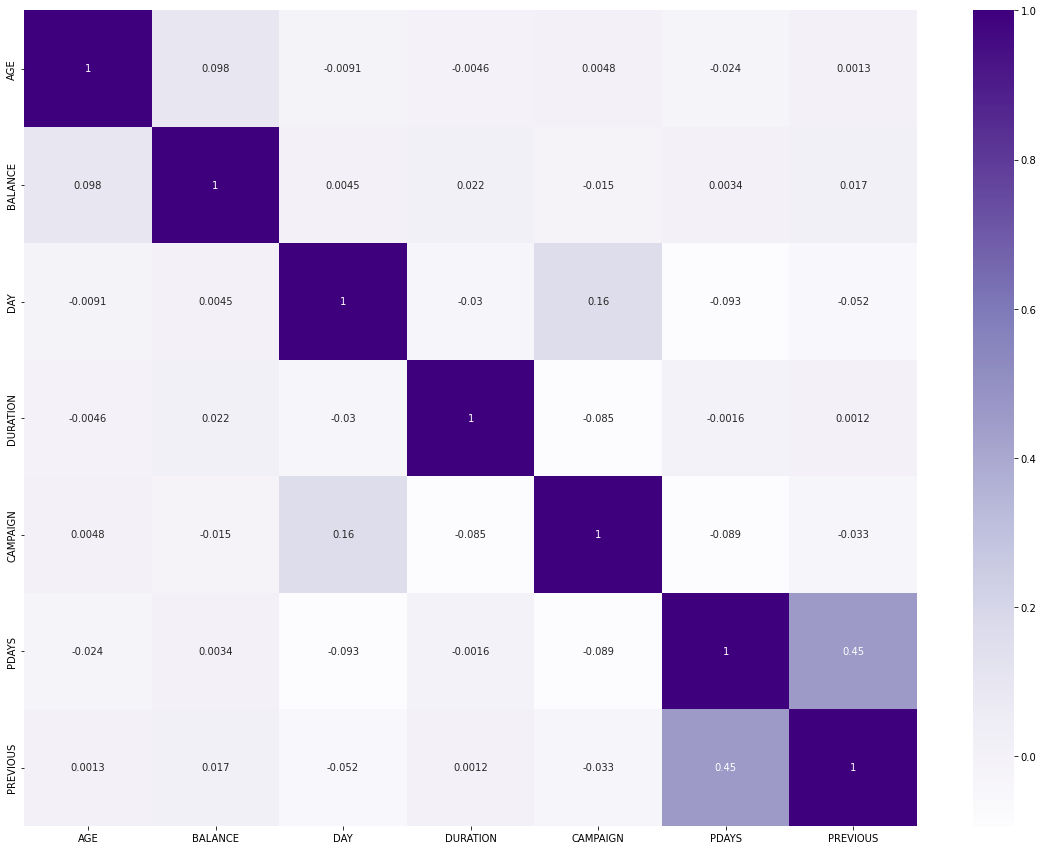

In [780]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="Purples") 

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

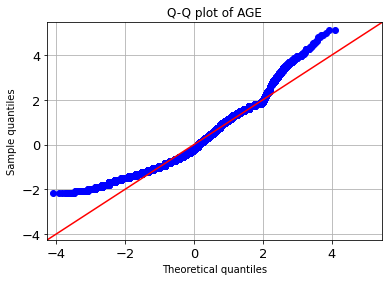

<Figure size 576x360 with 0 Axes>

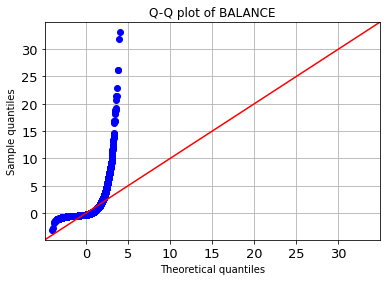

<Figure size 576x360 with 0 Axes>

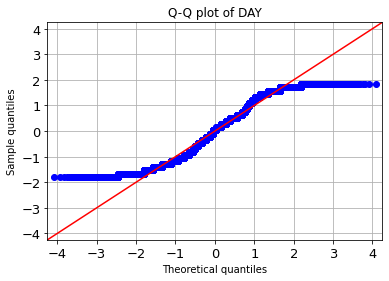

<Figure size 576x360 with 0 Axes>

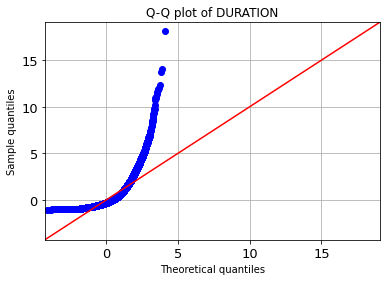

<Figure size 576x360 with 0 Axes>

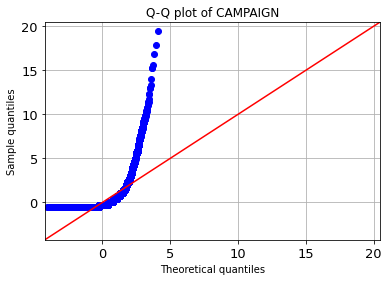

<Figure size 576x360 with 0 Axes>

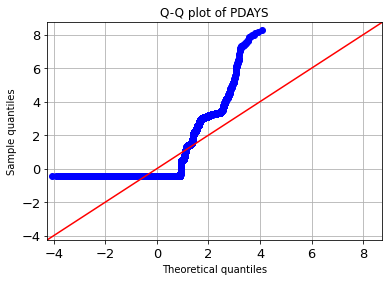

<Figure size 576x360 with 0 Axes>

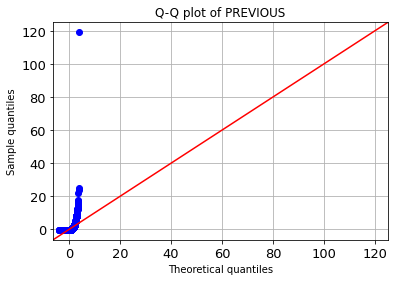

In [781]:
#QQ Plot

from statsmodels.graphics.gofplots import qqplot
data_norm=df[['AGE', 'BALANCE', 'DAY', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=10)
  plt.ylabel("Sample quantiles",fontsize=10)
  plt.title("Q-Q plot of {}".format(c),fontsize=12)
  plt.grid(True)
  plt.show()

In [782]:
#OLS

import statsmodels.api as sm

model = sm.OLS(df['AGE'], df[['BALANCE', 'DAY', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    AGE   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          3.017e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        04:37:09   Log-Likelihood:                     -1.9705e+05
No. Observations:               45211   AIC:                                  3.941e+05
Df Residuals:                   45205   BIC:                                  3.942e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BALANCE        0.0012   2.88e-05     40.798      0.000       0.001       0.001
DAY            1.3364      0.008    173.681      0.000       1.321       1.352
DURATION       0.0258      0.000     82.093      0.000       0.025       0.026
CAMPAIGN       1.4654      0.028     52.152      0.000       1.410       1.520
PDAYS          0.0328      0.001     33.409      0.000       0.031       0.035
PREVIOUS       0.3008      0.043      6.942      0.000       0.216       0.386
==============================================================================
Omnibus:                      364.600   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.217
Skew:                          -0.162   Prob(JB):                     6.26e-94
Kurtosis:                       3.351   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

BUT As we saw before the data is (45211,17) so, when you run an H20 AutML model with max runtime, the train takes exactly 1 hour and the test take 20 minutes, which is ridiculously long, how do I know?... I ran the script for 1 hour...So, we will randomise and limit the number of rows ahead.

In [783]:
df = df.sample(n=2000)

In [784]:
df

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
24507,52,management,married,tertiary,no,0,yes,no,cellular,17,nov,164,2,-1,0,unknown,no
1976,32,blue-collar,single,secondary,no,-83,yes,no,unknown,9,may,116,3,-1,0,unknown,no
40268,55,blue-collar,married,secondary,no,4577,no,no,cellular,15,jun,24,1,-1,0,unknown,no
10345,49,entrepreneur,married,secondary,yes,-178,no,yes,unknown,12,jun,84,1,-1,0,unknown,no
13654,58,housemaid,married,primary,no,0,yes,no,telephone,9,jul,148,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25374,50,technician,divorced,secondary,no,2910,no,yes,cellular,18,nov,364,2,-1,0,unknown,no
30717,49,management,married,secondary,no,48,no,no,cellular,6,feb,526,4,-1,0,unknown,no
33595,23,blue-collar,single,secondary,no,206,yes,no,cellular,20,apr,116,3,-1,0,unknown,no
40959,32,management,married,tertiary,no,1388,yes,no,cellular,13,aug,102,1,105,1,success,no


##H20 initialisation

In [785]:
! pip install h2o
import h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [786]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 19 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_75r5m5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.600 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Converting pandas into H20 Dataframe

In [787]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


And let's have a look

In [788]:
h2o_df

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
52,management,married,tertiary,no,0,yes,no,cellular,17,nov,164,2,-1,0,unknown,no
32,blue-collar,single,secondary,no,-83,yes,no,unknown,9,may,116,3,-1,0,unknown,no
55,blue-collar,married,secondary,no,4577,no,no,cellular,15,jun,24,1,-1,0,unknown,no
49,entrepreneur,married,secondary,yes,-178,no,yes,unknown,12,jun,84,1,-1,0,unknown,no
58,housemaid,married,primary,no,0,yes,no,telephone,9,jul,148,1,-1,0,unknown,no
37,technician,single,tertiary,no,6101,no,no,cellular,4,may,60,5,87,1,success,no
33,technician,single,secondary,no,0,yes,no,cellular,28,jan,191,2,-1,0,unknown,no
31,management,married,tertiary,no,1384,yes,no,cellular,30,jan,203,2,2,3,other,no
30,services,married,secondary,yes,-849,yes,no,unknown,30,may,138,2,-1,0,unknown,no
42,blue-collar,single,primary,no,92,no,no,cellular,30,jul,86,2,-1,0,unknown,no


Making sure the data is proper with no missing values

In [789]:
h2o_df.describe()

Rows:2000
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-2082.0,,,,1.0,,5.0,1.0,-1.0,0.0,,
mean,40.632499999999986,,,,,1405.4675,,,,15.876500000000016,,258.84100000000063,2.679000000000003,38.429000000000066,0.5515000000000012,,
maxs,83.0,,,,,52587.0,,,,31.0,,3322.0,36.0,760.0,20.0,,
sigma,10.552398794120457,,,,,3360.48595993008,,,,8.312147354734716,,256.21631509148574,2.842885857715711,98.20321224098126,1.740650074351728,,
zeros,0,,,,,166,,,,0,,0,0,0,1651,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,52.0,management,married,tertiary,no,0.0,yes,no,cellular,17.0,nov,164.0,2.0,-1.0,0.0,unknown,no
1,32.0,blue-collar,single,secondary,no,-83.0,yes,no,unknown,9.0,may,116.0,3.0,-1.0,0.0,unknown,no
2,55.0,blue-collar,married,secondary,no,4577.0,no,no,cellular,15.0,jun,24.0,1.0,-1.0,0.0,unknown,no


The data looks good and is ready to go in a model!

##Test and Train Split

In [790]:
train, test = h2o_df.split_frame(ratios=[.75], seed=121)

X = train.columns
y = 'TERM_DEPOSIT'
X.remove(y)

Ran into an error ahead, so came back here since for Binary Classification it needs to be a factor, so we'll convert it to that

In [791]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

We've defined X and Y above, let's have a look at it to make sure it's all good

In [792]:
X

['AGE',
 'JOB',
 'MARITAL',
 'EDUCATION',
 'DEFAULT',
 'BALANCE',
 'HOUSING',
 'LOAN',
 'CONTACT',
 'DAY',
 'MONTH',
 'DURATION',
 'CAMPAIGN',
 'PDAYS',
 'PREVIOUS',
 'POUTCOME']

In [793]:
y

'TERM_DEPOSIT'

Regularisation

As the data is categorical with parameters for the main dependent variable being yes or no and categories like job and a whole section of customer info being incompatible with the parameters, performing Regularisation on just the remaining ones and excluding a big chunk would not help significantly, Thus, increasing the RMSE significantly. In this particular case, avoiding this method proved to give the best results.

#H20 AutoML

And we are finally here, let's initialise and run the test and train models

In [794]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=3600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121,
                max_models = 5) 

##Train

In [795]:
%time 
aml.train(x=X, 
          y=y,
          training_frame=train)

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 26 µs
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Let's look at the performance of all the models on a leaderboard

In [796]:
leaderb = aml.leaderboard
leaderb.head(rows=leaderb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716,0.914249,0.2171,0.594806,0.177949,0.256023,0.0655478
StackedEnsemble_AllModels_1_AutoML_17_20230301_43716,0.913544,0.218218,0.590373,0.180412,0.256521,0.0658029
GBM_1_AutoML_17_20230301_43716,0.910701,0.230926,0.589718,0.193665,0.266428,0.0709841
GLM_1_AutoML_17_20230301_43716,0.910094,0.23018,0.588744,0.199738,0.261541,0.0684035
DRF_1_AutoML_17_20230301_43716,0.902799,0.374297,0.554196,0.171459,0.296238,0.087757
XGBoost_1_AutoML_17_20230301_43716,0.897341,0.29966,0.546535,0.205784,0.302817,0.0916981
XGBoost_2_AutoML_17_20230301_43716,0.891384,0.276658,0.548067,0.219806,0.28772,0.0827828


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_17_20230301_43716,0.898417,0.271206,0.593735,0.201331,0.289046,0.0835478,584,0.041969,GBM
StackedEnsemble_AllModels_1_AutoML_17_20230301_43716,0.891268,0.26259,0.567774,0.217311,0.279072,0.0778811,13820,0.074262,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716,0.891183,0.262662,0.567685,0.217311,0.279089,0.0778907,12532,0.074002,StackedEnsemble
DRF_1_AutoML_17_20230301_43716,0.882896,0.576468,0.588885,0.182737,0.318266,0.101293,451,0.047112,DRF
XGBoost_2_AutoML_17_20230301_43716,0.882183,0.305991,0.553772,0.206799,0.303408,0.0920563,3526,0.033916,XGBoost
GLM_1_AutoML_17_20230301_43716,0.879364,0.290797,0.557369,0.249457,0.283398,0.0803144,166,0.030275,GLM
XGBoost_1_AutoML_17_20230301_43716,0.871553,0.341193,0.512461,0.204796,0.324366,0.105213,283,0.033273,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716

,no,yes,Error,Rate
no,404.0,29.0,0.067,(29.0/433.0)
yes,25.0,43.0,0.3676,(25.0/68.0)
Total,429.0,72.0,0.1078,(54.0/501.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

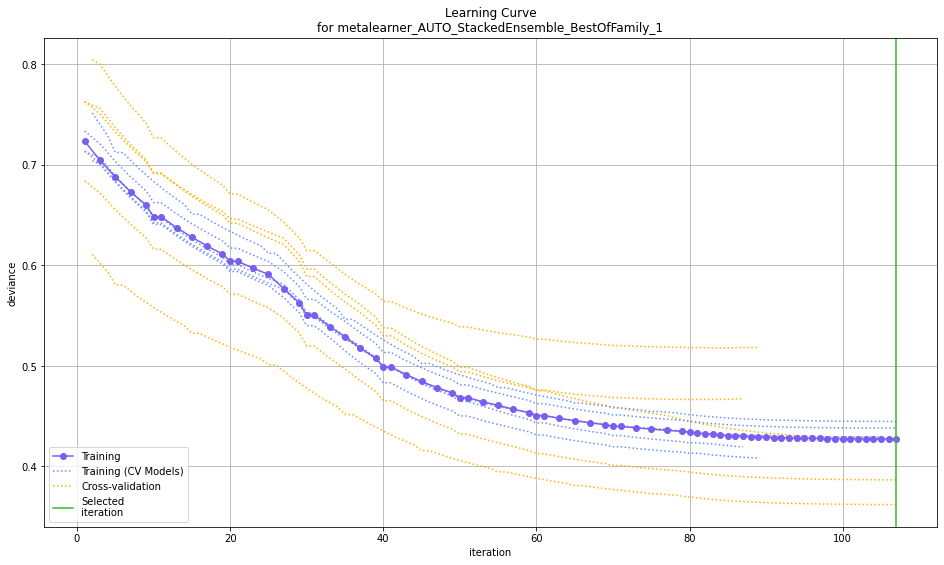

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

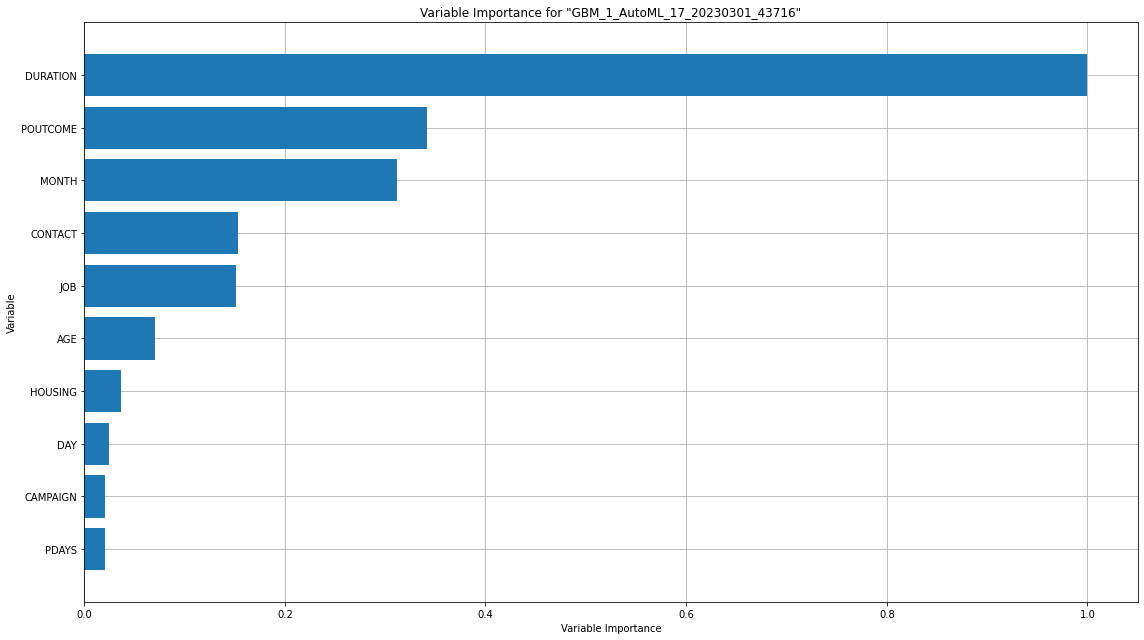

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

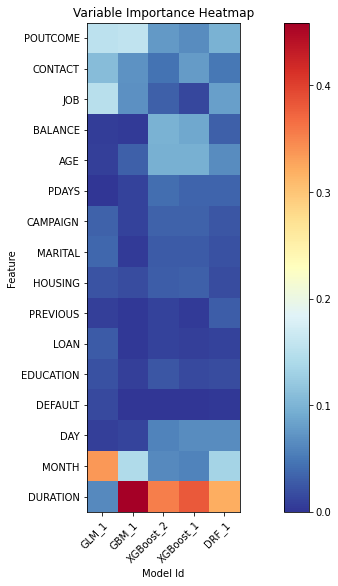

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

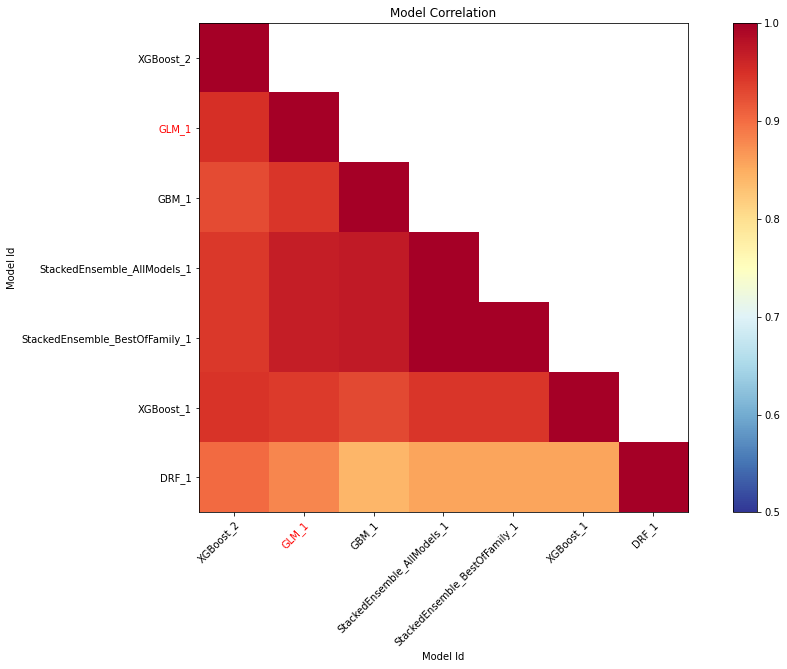

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

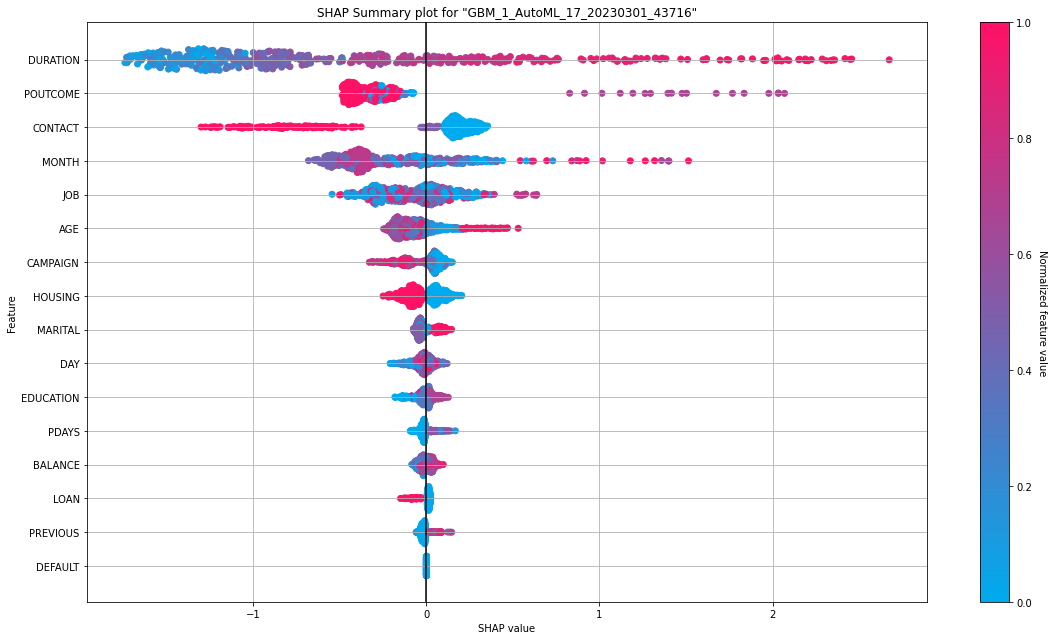

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

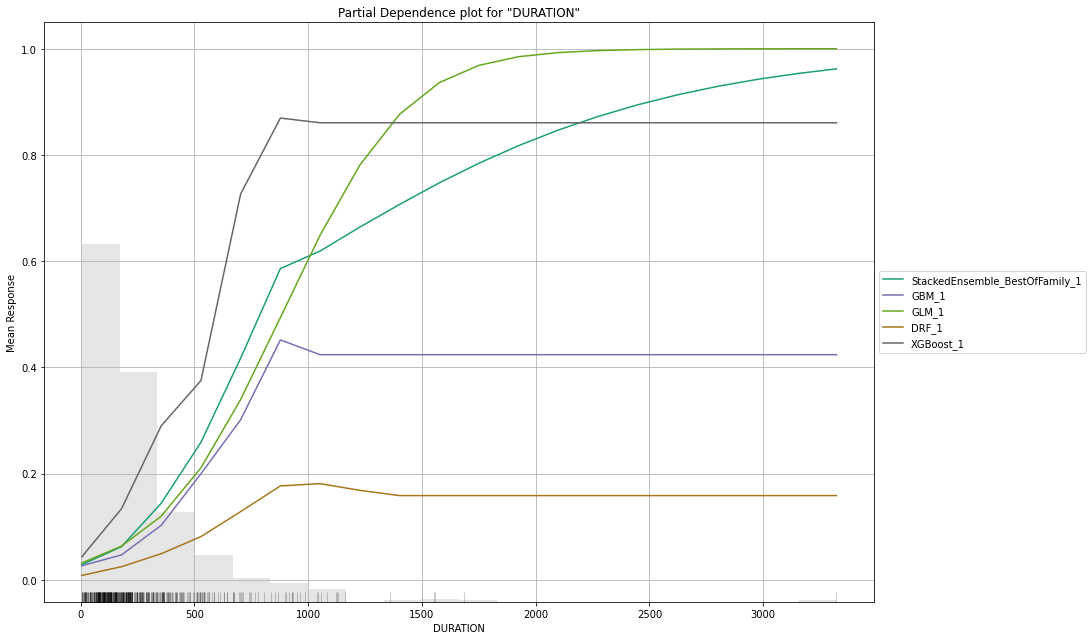

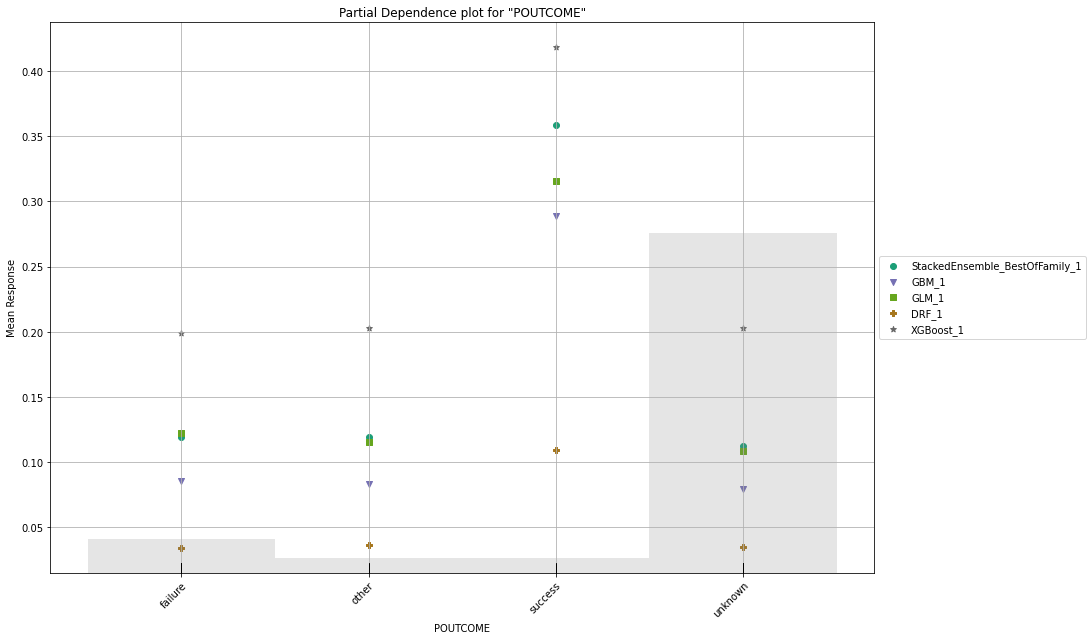

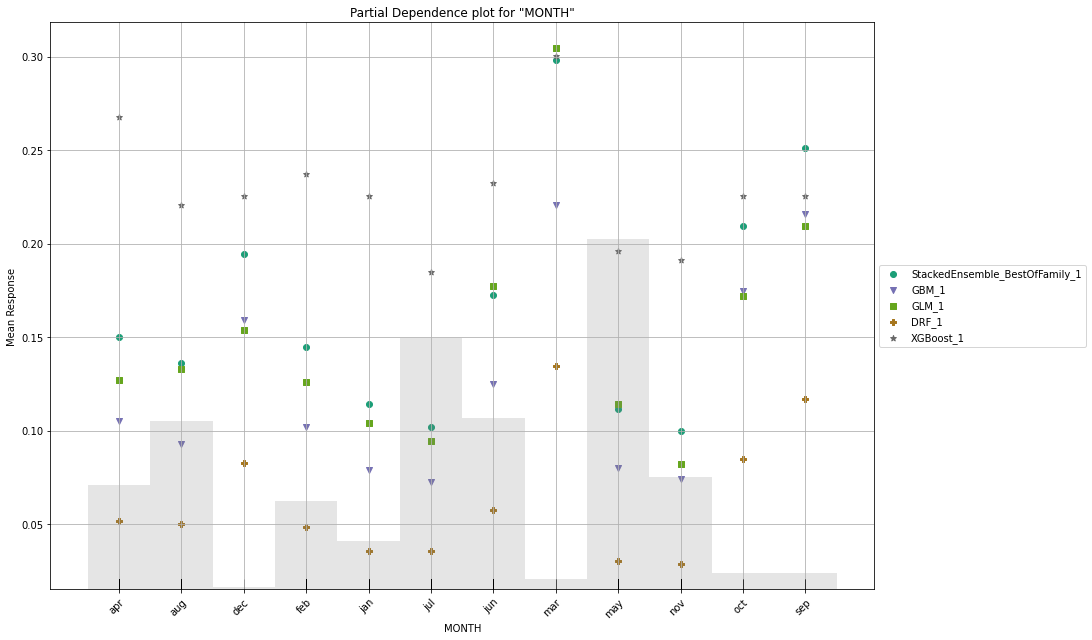

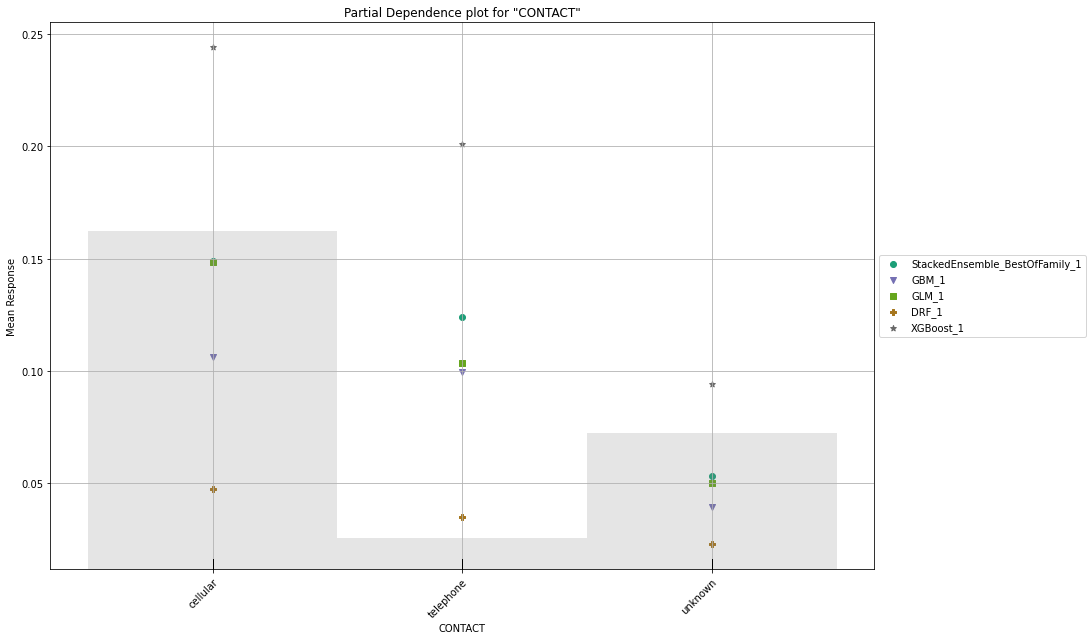

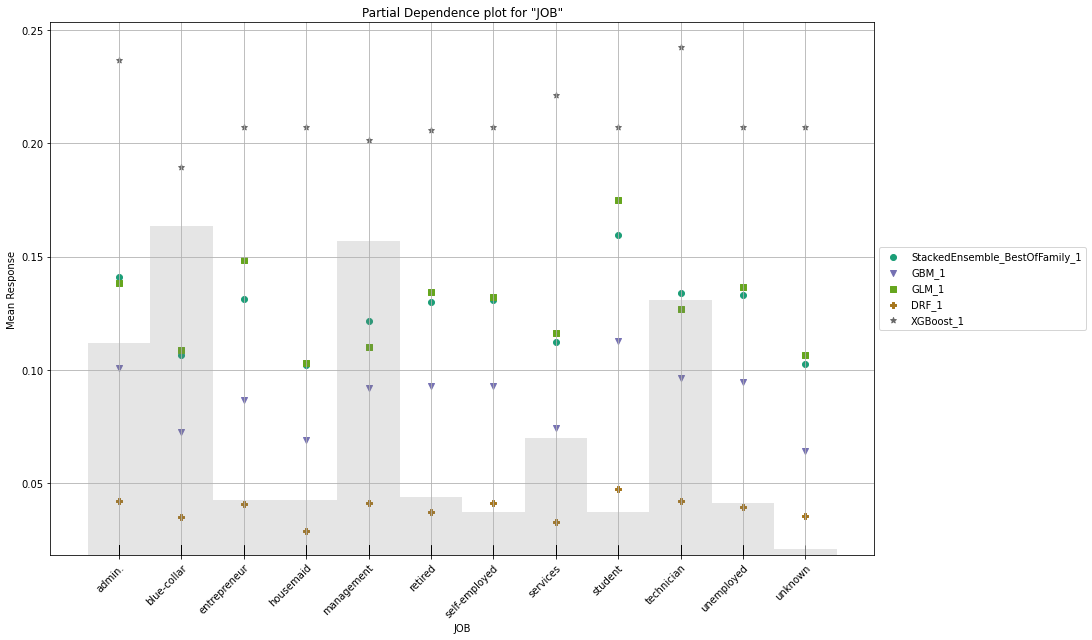

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_17_20230301_43716,0.898417,0.271206,0.593735,0.201331,0.289046,0.0835478,584,0.041969,GBM
StackedEnsemble_AllModels_1_AutoML_17_20230301_43716,0.891268,0.26259,0.567774,0.217311,0.279072,0.0778811,13820,0.074262,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716,0.891183,0.262662,0.567685,0.217311,0.279089,0.0778907,12532,0.074002,StackedEnsemble
DRF_1_AutoML_17_20230301_43716,0.882896,0.576468,0.588885,0.182737,0.318266,0.101293,451,0.047112,DRF
XGBoost_2_AutoML_17_20230301_43716,0.882183,0.305991,0.553772,0.206799,0.303408,0.0920563,3526,0.033916,XGBoost
GLM_1_AutoML_17_20230301_43716,0.879364,0.290797,0.557369,0.249457,0.283398,0.0803144,166,0.030275,GLM
XGBoost_1_AutoML_17_20230301_43716,0.871553,0.341193,0.512461,0.204796,0.324366,0.105213,283,0.033273,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716

,no,yes,Error,Rate
no,404.0,29.0,0.067,(29.0/433.0)
yes,25.0,43.0,0.3676,(25.0/68.0)
Total,429.0,72.0,0.1078,(54.0/501.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [797]:
aml.explain(test)

Let's have a better look at the model that did the best

In [798]:
best = aml.leader
metalearner = h2o.get_model(best.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:926: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Listing out all the most important variables 

In [799]:
metalearner.varimp()

[('GBM_1_AutoML_17_20230301_43716',
  0.8370662927627563,
  1.0,
  0.3596848517939105),
 ('DRF_1_AutoML_17_20230301_43716',
  0.6871551871299744,
  0.8209089209195165,
  0.29526850355723533),
 ('GLM_1_AutoML_17_20230301_43716',
  0.5150752663612366,
  0.6153338998530438,
  0.22132628257241105),
 ('XGBoost_1_AutoML_17_20230301_43716',
  0.2879246771335602,
  0.3439687867292544,
  0.1237203620764431)]

Plotting out heatmaps with different relations using correlation, leaderboards, etc.

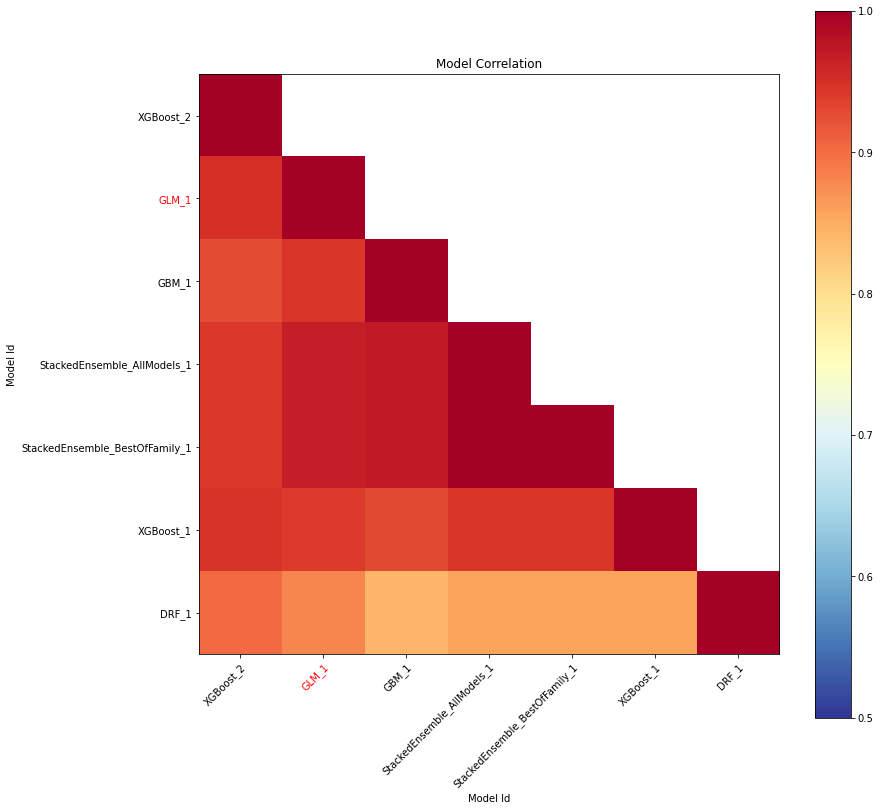

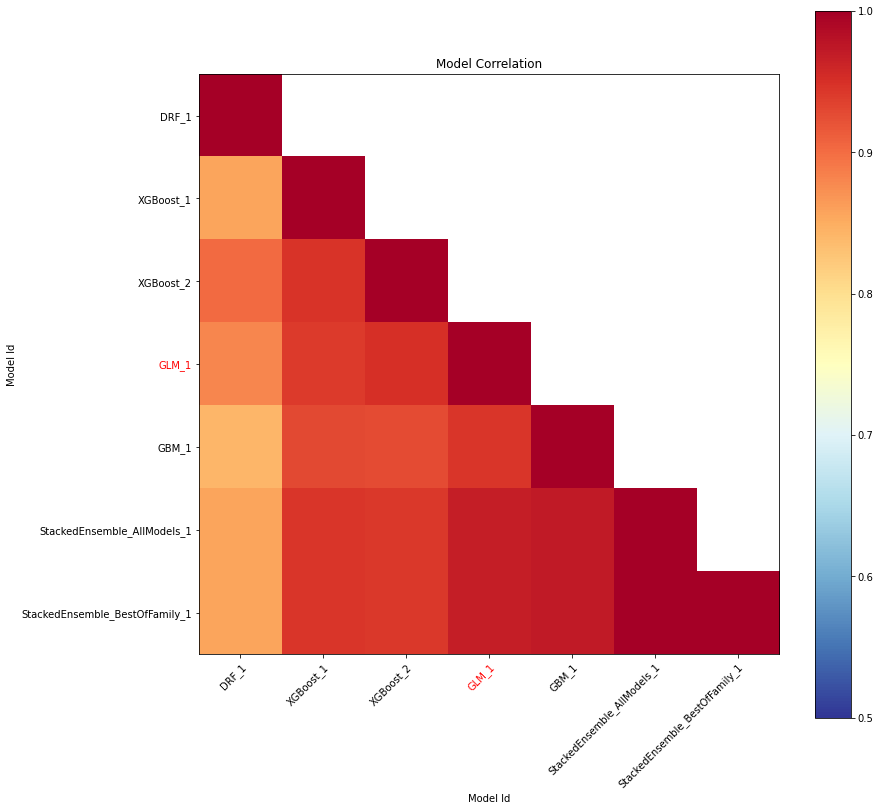

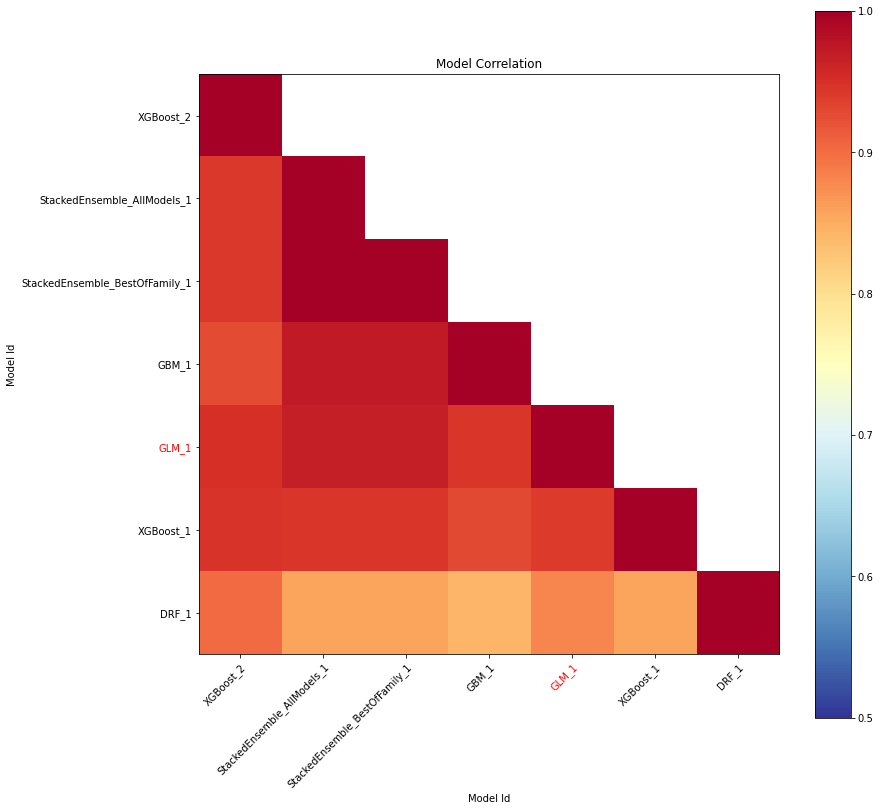

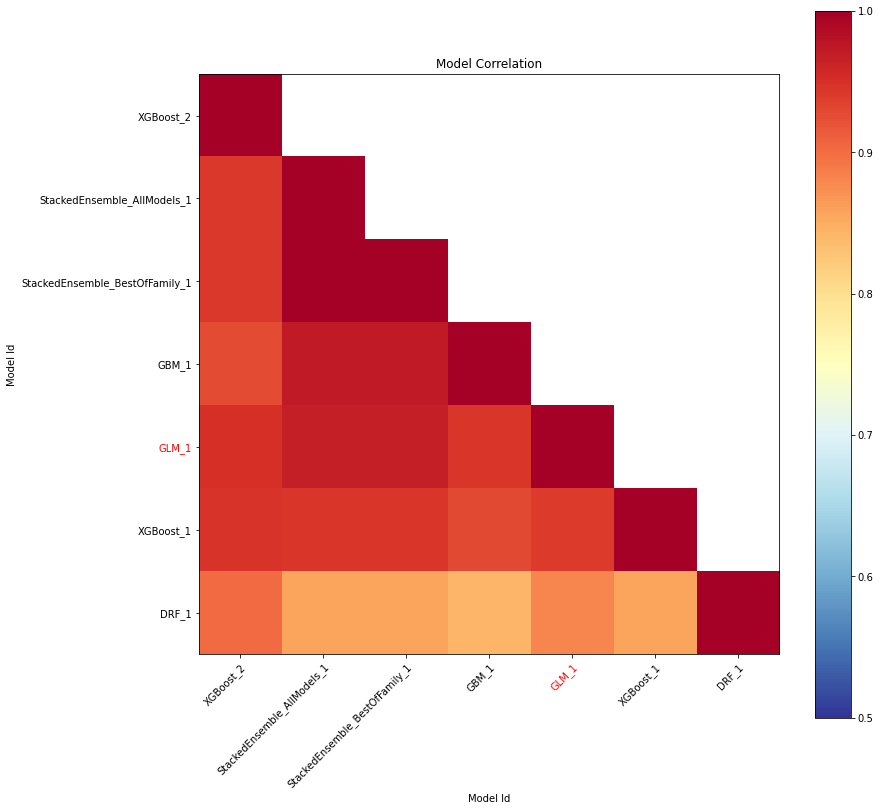

In [800]:
mc_plot = aml.model_correlation_heatmap(test)

mc_plot = h2o.model_correlation_heatmap(aml.leaderboard.sort("rmse").head(10), test)

mc_plot = h2o.model_correlation_heatmap(h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms").head(10), test)

leaderboard = h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms")
mc_plot = h2o.model_correlation_heatmap(leaderboard.head(5).rbind(leaderboard[leaderboard["model_id"].grep("StackedEnsemble", output_logical=True)]), test)

Let's have AutoML explain the leader

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_17_20230301_43716

,no,yes,Error,Rate
no,404.0,29.0,0.067,(29.0/433.0)
yes,25.0,43.0,0.3676,(25.0/68.0)
Total,429.0,72.0,0.1078,(54.0/501.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

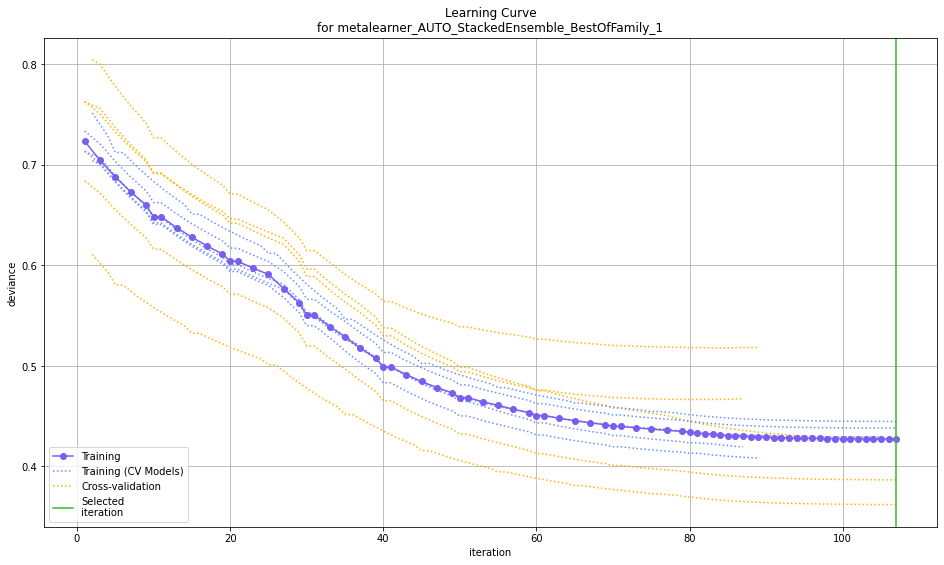

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

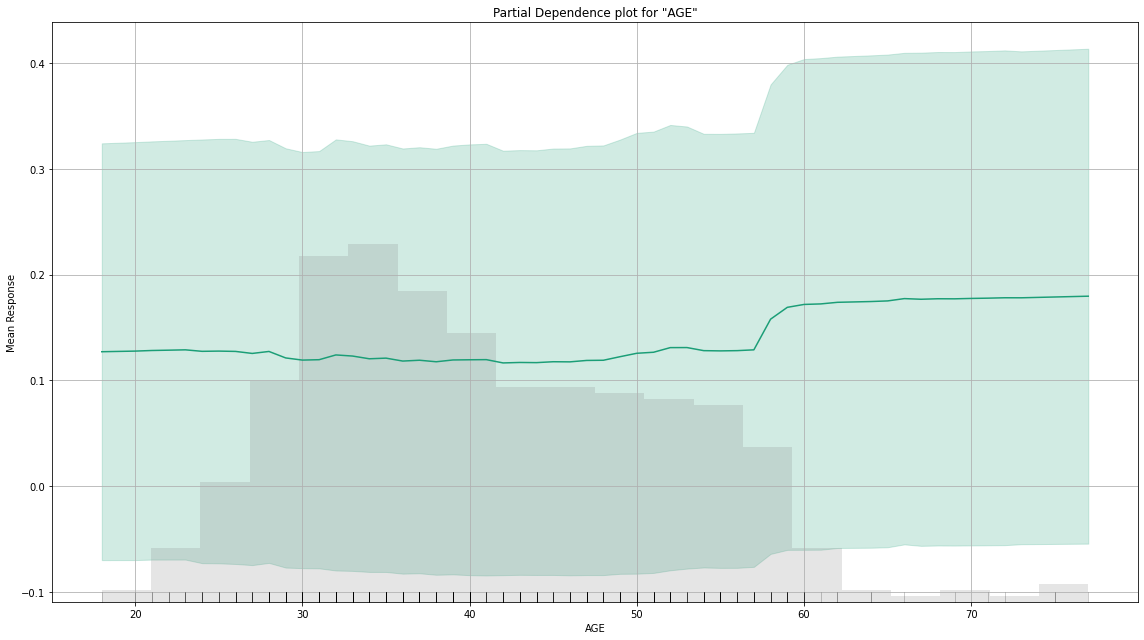

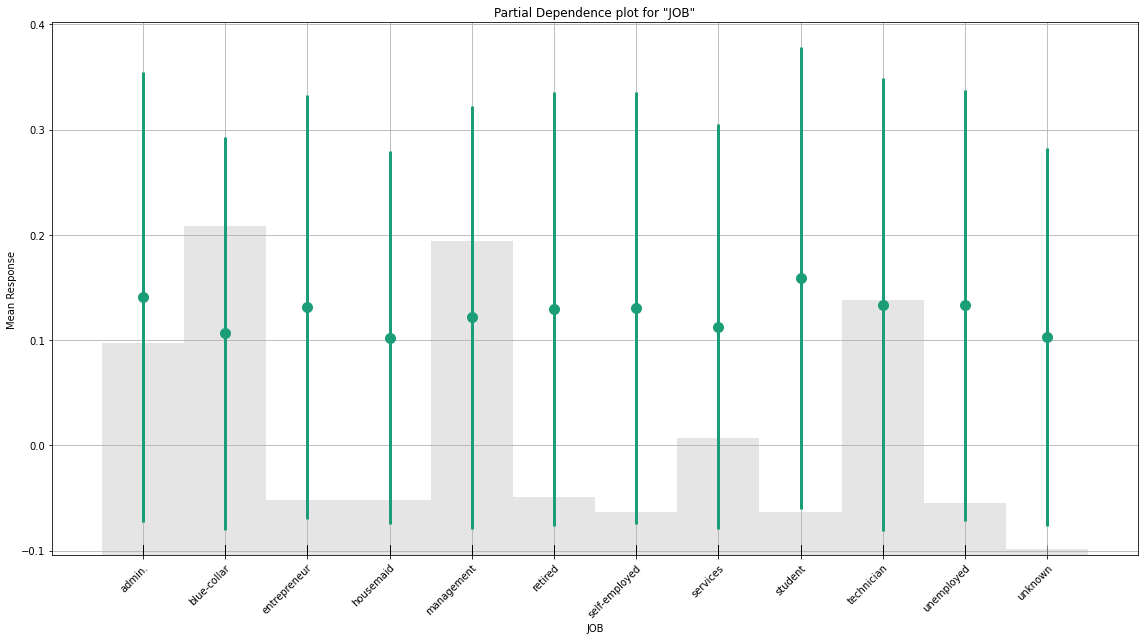

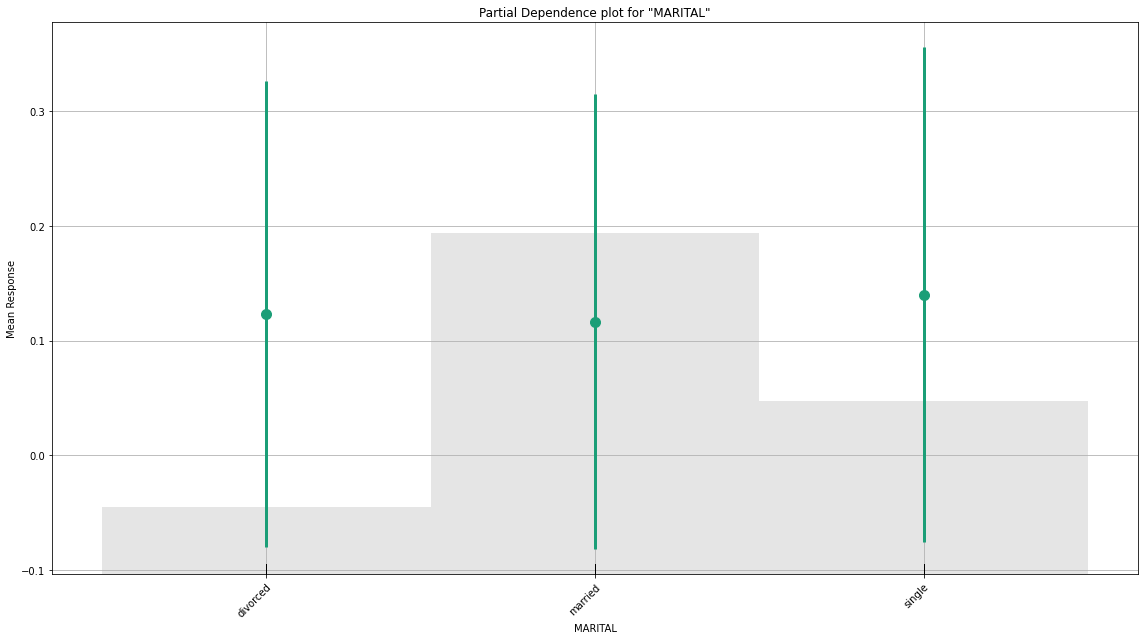

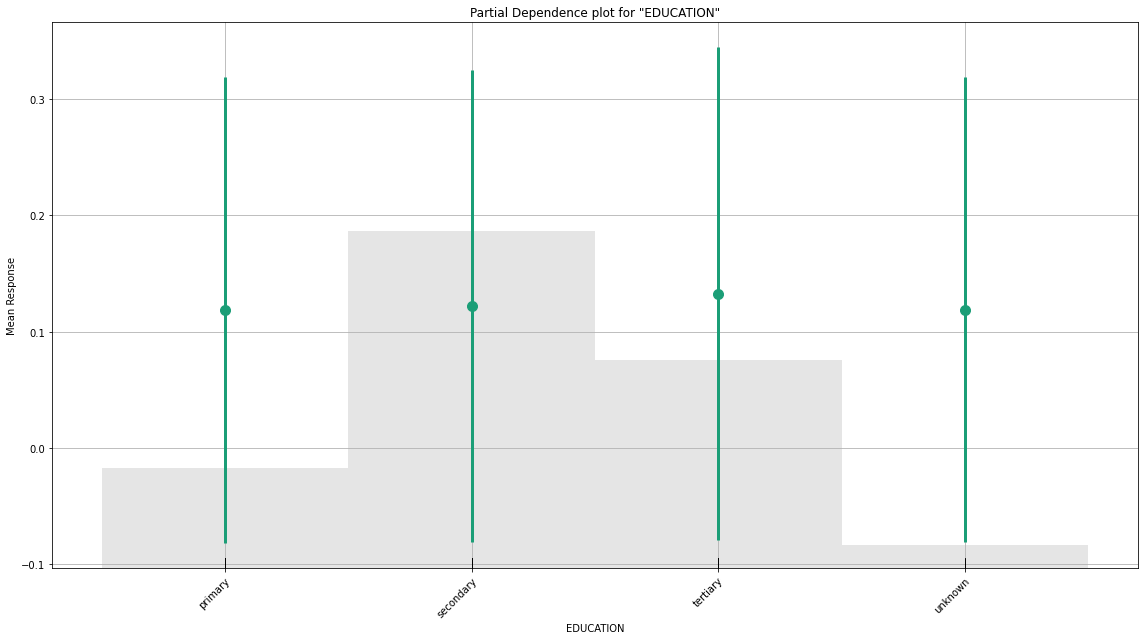

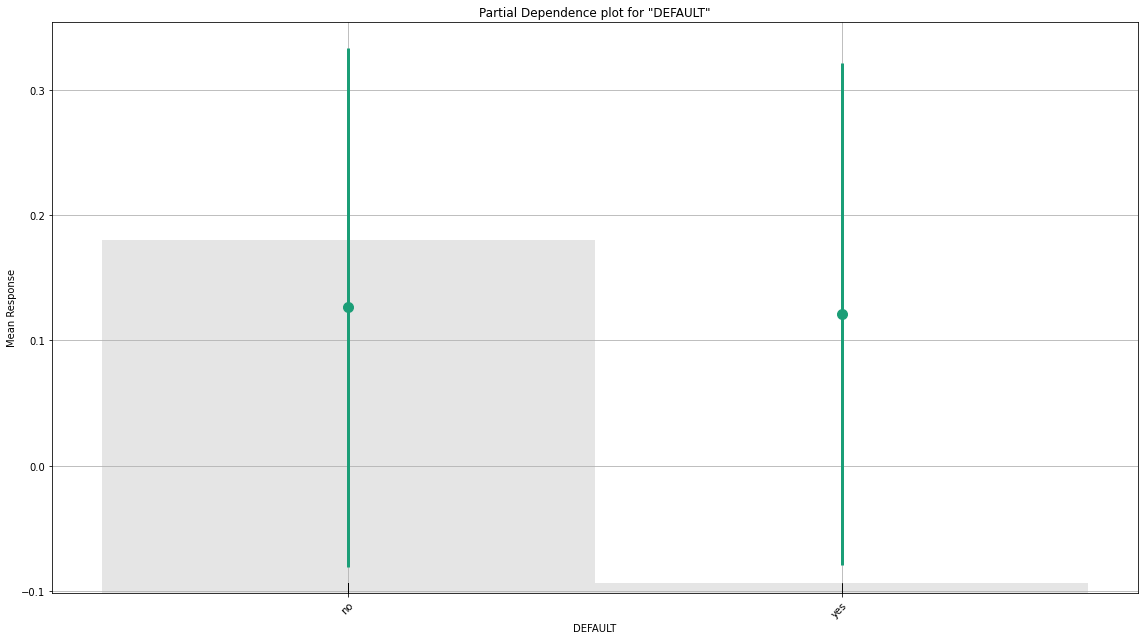

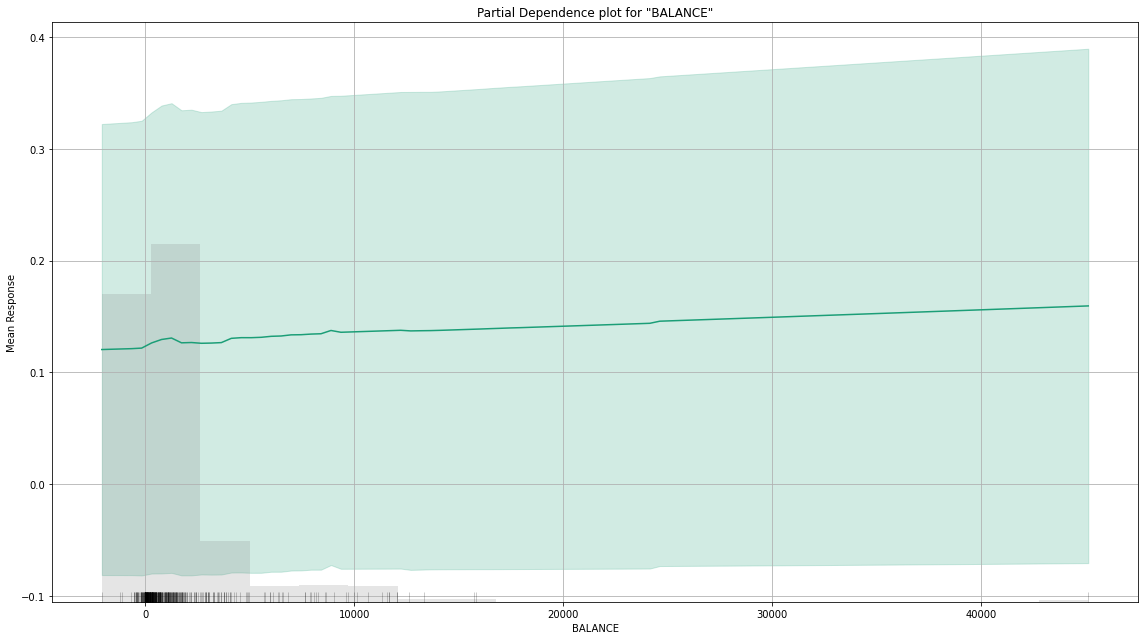

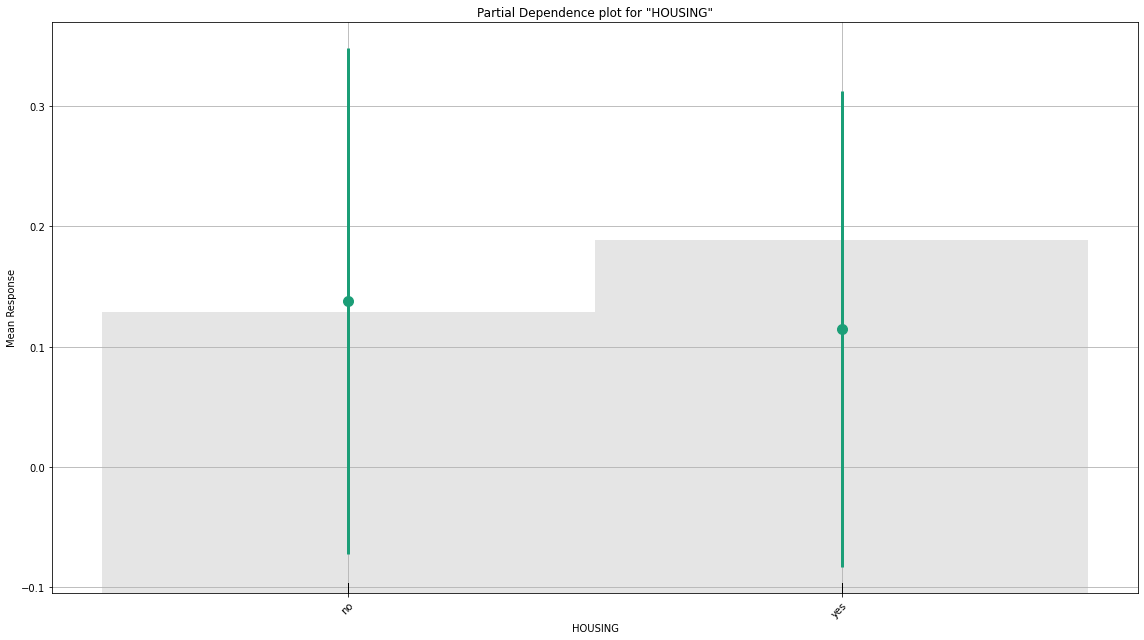

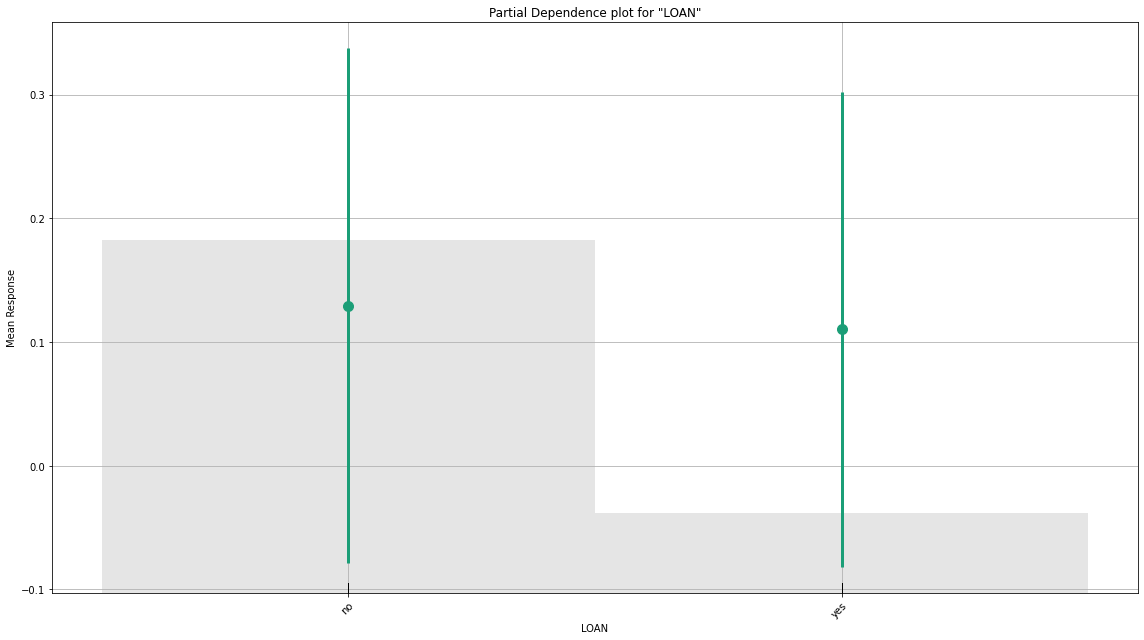

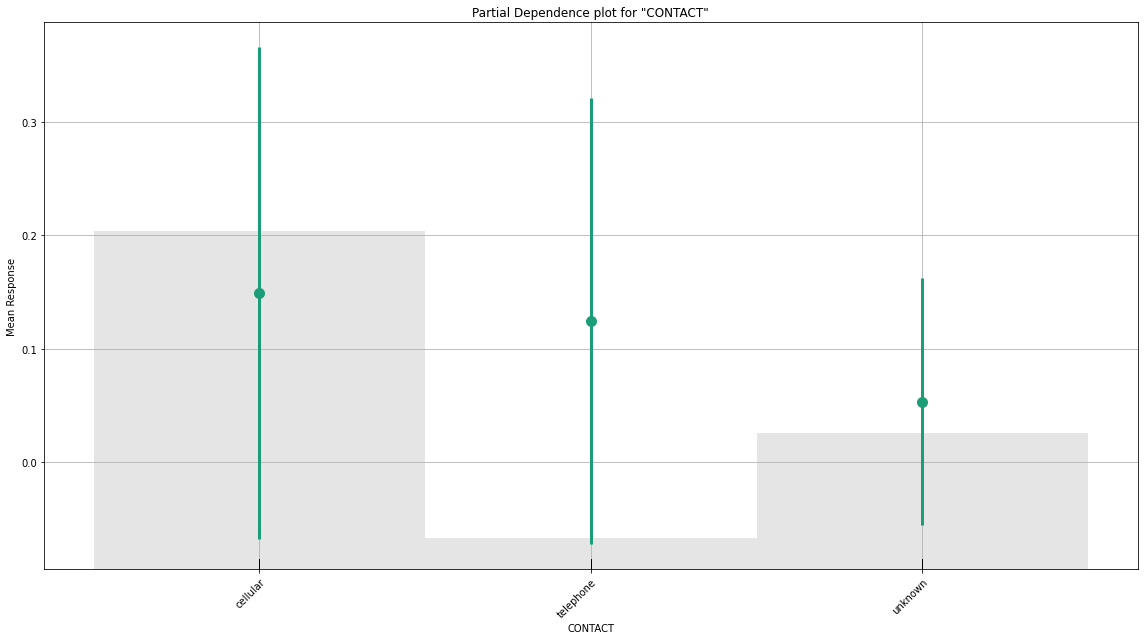

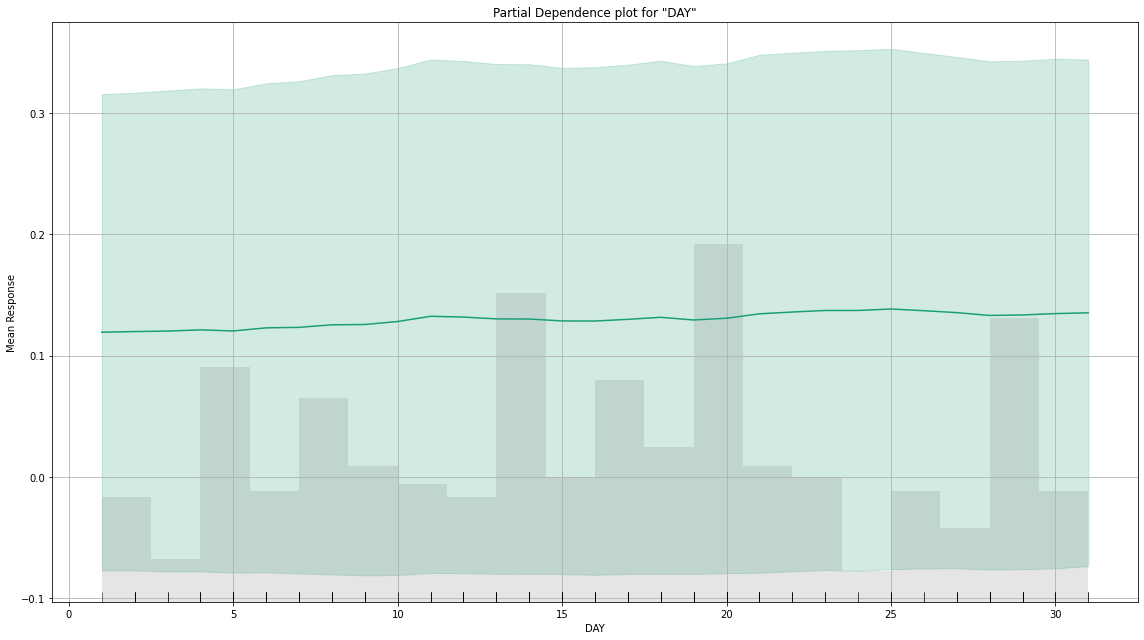

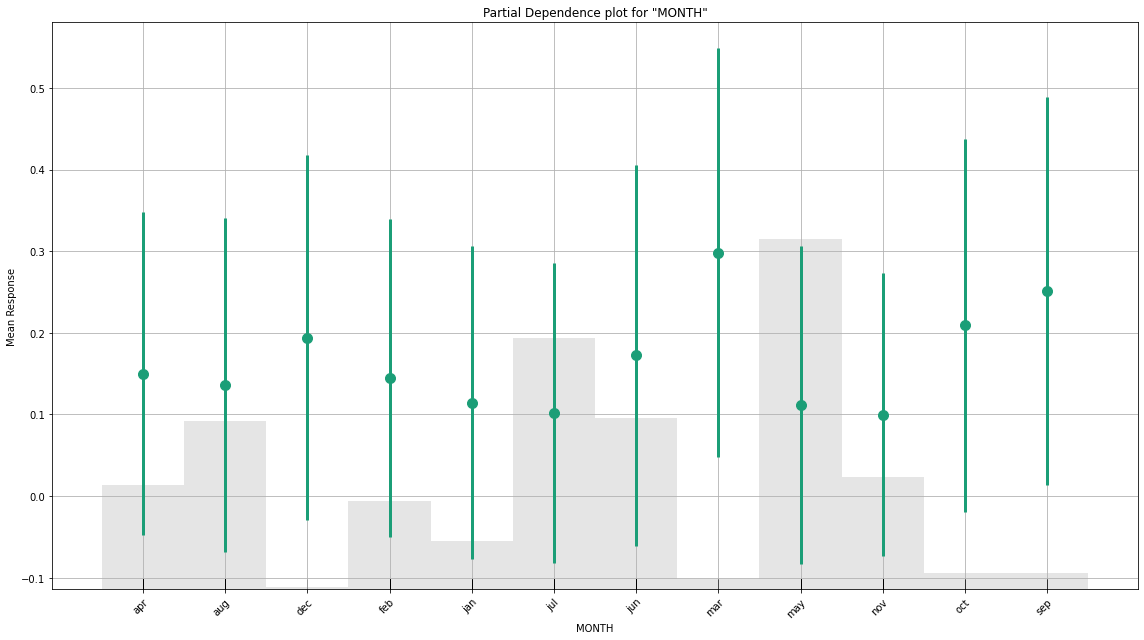

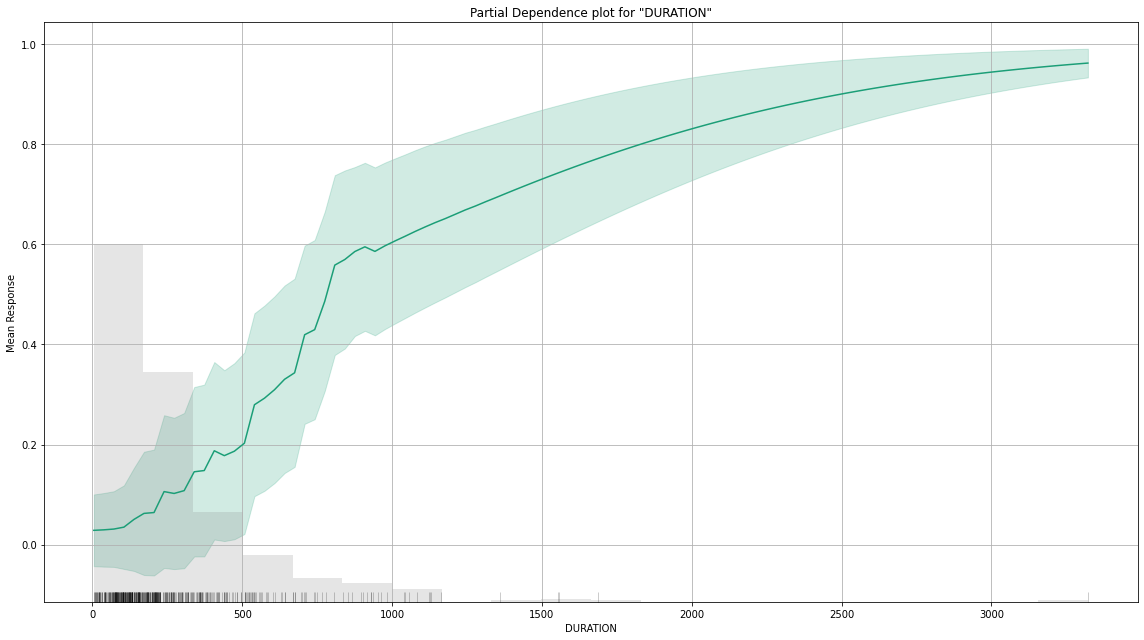

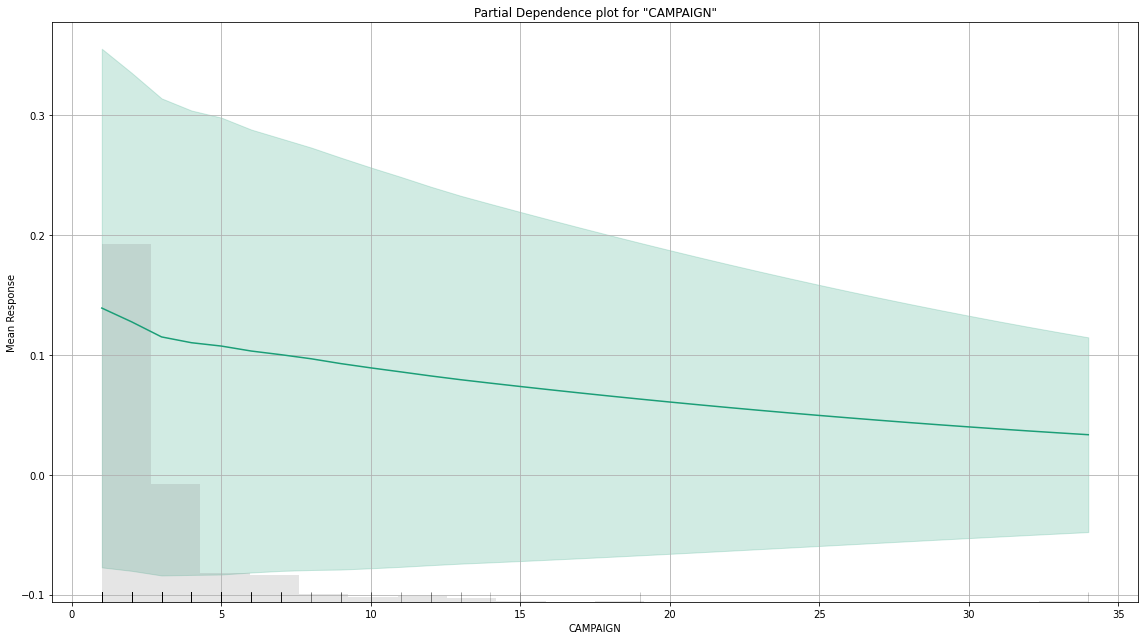

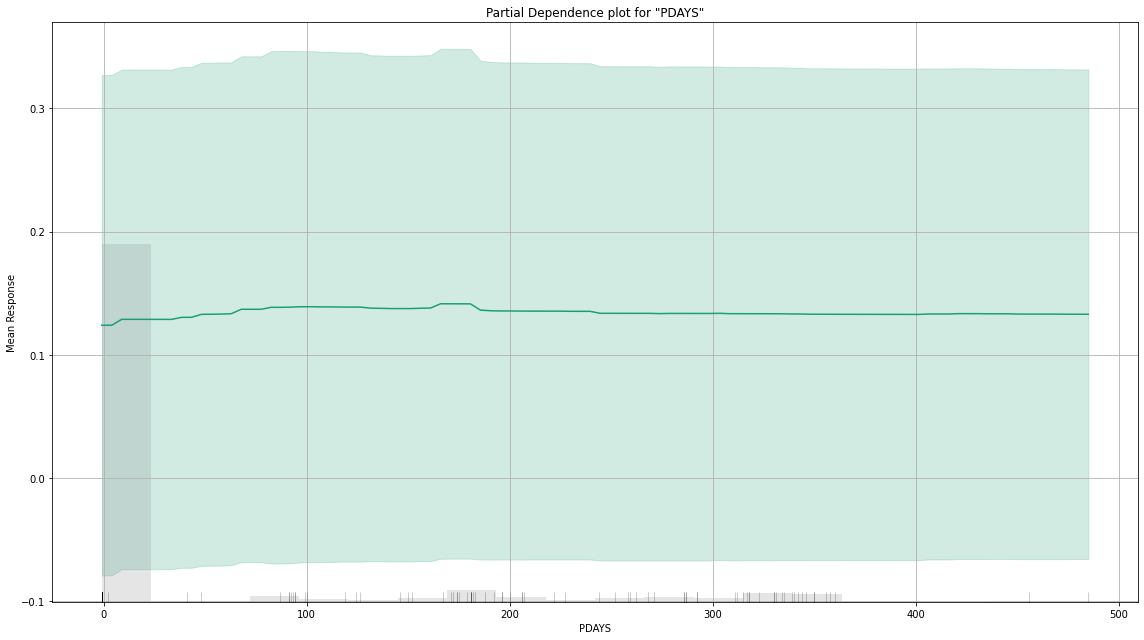

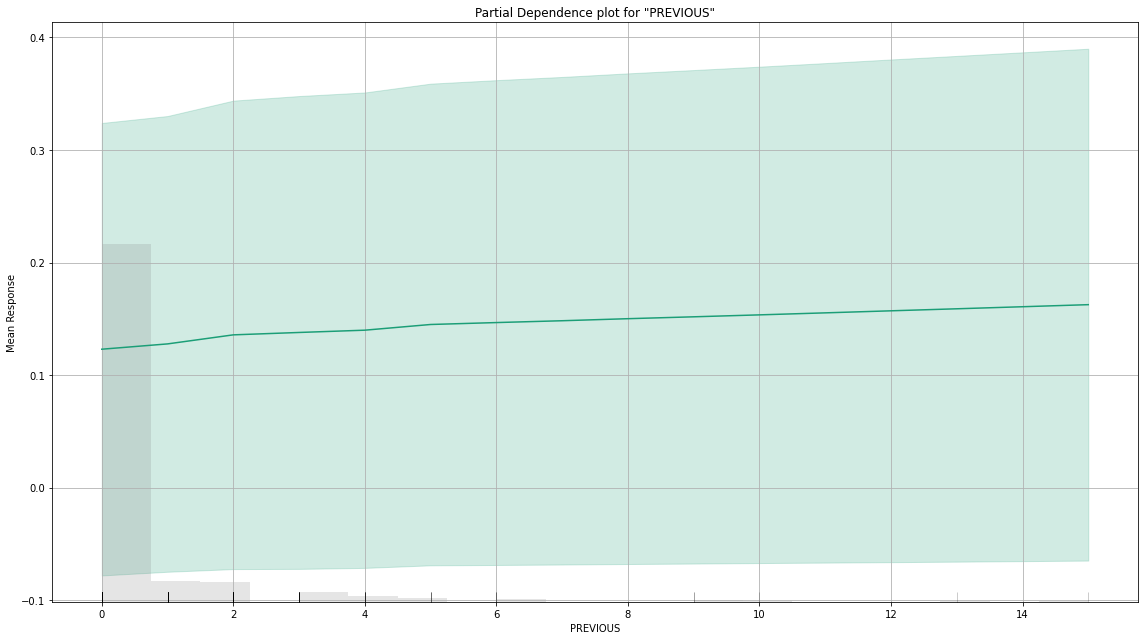

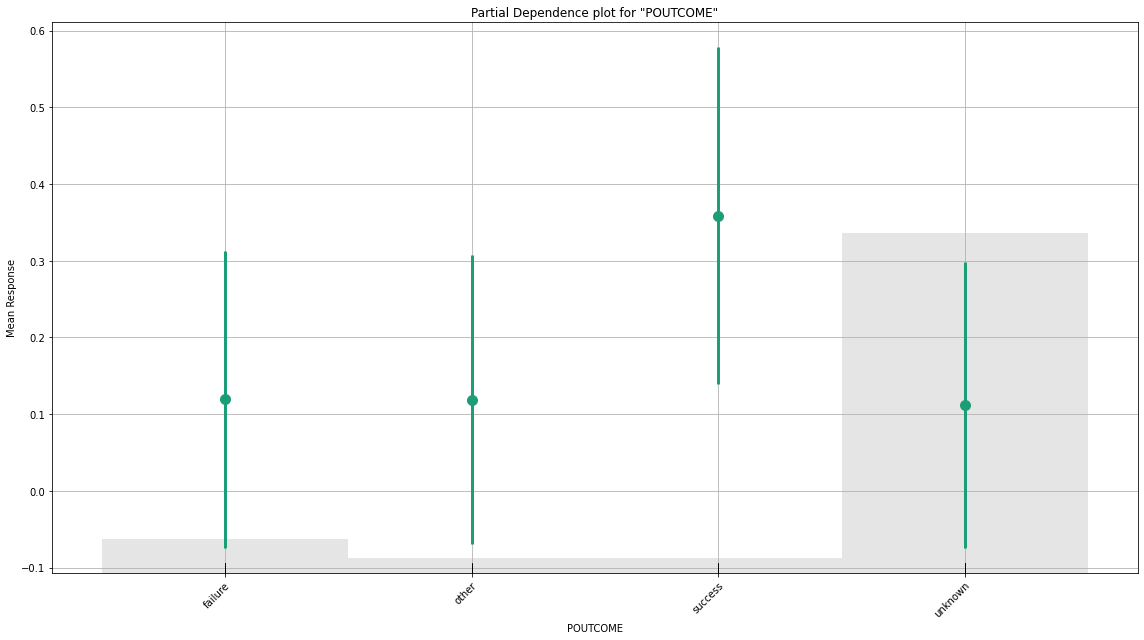

In [801]:
exm = aml.leader.explain(test)

# **Conclusion**




Multiple classification algorithms were employed using H20 to predict the success of a bank's telemarketing campaign. Tests such as p-values were used to exclude irrelevant independent variables. The H20.ai framework was utilized to train and test the variables of the dataset, with the "gbm" model being the most effective and achieving 92% accuracy for the test data.

The results suggest that the proposed classification model has the ability to effectively analyze and predict housing prices to some extent. However, the accuracy of the model is limited in specific scenarios, indicating a need for further research to improve its performance. To achieve better predictions in future studies, different techniques such as removing outliers and utilizing ensemble or booster methods should be considered.

* Is the relationship significant?<br>
 P value is the indicator for a relationship being significant or not, as we see in the heatmaps and the models, there are multiple input variables with high p-values with multicolinearity in place, suggesting that the relationship is significant.
* Are any model assumptions violated?<br>
 Linear relationship - Target variable being plotted against all other independent variables shows that linear relation is observed for few of them. Thus, this assumption is not violated.
Homoscedasticity - The plot for residuals is normally distributed forming a bell-curve shape
No or little multicollinearity - Assumptions here are violated asmulticolinearity exists in the variables as seen in the heatmap.
Durbin-Watson test - The value lies between 1.5 to 2.5 thus, the assumption is not violated
* Is there any multicollinearity in the model?<br>
 Yes, As seen in the heatmap there are multiple features that have high colinearity ranging over 90% as well.
* In the multivariate models are predictor variables independent of all the other predictor variables?<br>
 When put through the models, we notice through the correlation matrices and the graphs that there are correlated variables like age and balance.
* In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.<br>
 We can see the most important features listed out in the code above as Duration, Month, Age and Job in a hierarchial ranking. Apparently, the most insignificant one was 'Education'.
* Does the model make sense?<br>
 The model does make sense as most of the assumptions for ranges of the values are met, the output is distributed properly and the correlations and expected features also make sense like rise in bank balance with age.
* Does regularization help?<br>
 As we saw through the generated GLM model above, Regularisation does not necessarily help as it drives the RMSE higher while not significantly making positive differences on the other variables.
* Which independent variables are significant?<br>
The most significant independent variables were Duration, Month, Age, job, day, balance, poutcome.
* Which hyperparameters are important?<br>
 Some of the most important ones were ntrees, max_depth in XGBoost and GBM were used to determine the best AUC.

# **References**



S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c
bank-term-deposit-marketing-strategy-with-automatic-machine-learning-h2o-automl-cfd06fc66e98

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

https://medium.com/swlh/exploratory-data-analysis-on-the-bank-marketing-data-set-with-pandas-and-seaborn-72e5c05e0076





---



**Data Source:**

https://archive.ics.uci.edu/ml/datasets/bank+marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



---



MIT License

Copyright (c) 2023 Varadmurty Mohod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.